1. IMPORT

In [2]:
import  cv2 
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from IPython.display import clear_output, display


2. KEYPOINTS USING MP

In [3]:
# holistic model
mp_holistic = mp.solutions.holistic
# drawaing utilities
mp_drawing = mp.solutions.drawing_utils

mp_pose = mp.solutions.pose
mp_hands = mp.solutions.hands
mp_face_mesh = mp.solutions.face_mesh

In [4]:
def mediapipe_detection(image, model):
    # color convert BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # image is no longer wrtieable 
    image.flags.writeable = False
    # make predictions
    results = model.process(image)
    # makes the image writeable again
    image.flags.writeable = True
    # color convert RGB to BGR
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
    return image, results

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face landmarks
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION, 
            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
            mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
        )

    # Draw pose landmarks
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
        )

    # Draw left hand landmarks
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.left_hand_landmarks,
            mp_hands.HAND_CONNECTIONS, 
            mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
            mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
        )

    # Draw right hand landmarks
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.right_hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
        )

In [12]:
cap = cv2.VideoCapture(0)

try:
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        while cap.isOpened():
            # read the feed
            ret, frame = cap.read()

            # make detections
            image, results = mediapipe_detection(frame, holistic)

            # draw landmarks
            draw_styled_landmarks(image, results)

            #show to screen
            cv2.imshow('OpenCV feed', image)

            # PRESS 'q' to quit
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

except KeyboardInterrupt:
    print("Interrupted manually.")

finally:
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1747423426.234029 5306978 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2 Pro
W0000 00:00:1747423426.312629 5354339 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1747423426.326600 5354343 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1747423426.329428 5354343 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1747423426.329838 5354345 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1747423426.330681 5354337 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling supp

Interrupted manually.


In [6]:
len(results.left_hand_landmarks.landmark)

NameError: name 'results' is not defined

In [14]:
results

mediapipe.python.solution_base.SolutionOutputs

In [15]:
draw_styled_landmarks(frame, results)

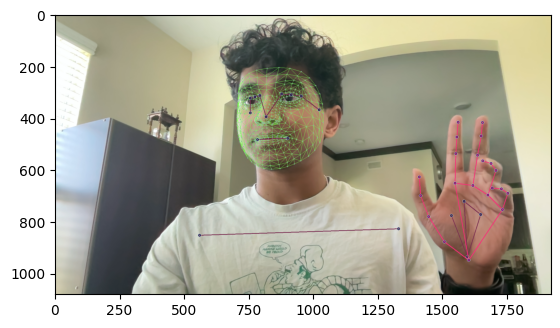

In [16]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

3. EXTRACT KEY POINTS

In [17]:
results.pose_landmarks

landmark {
  x: 0.424660236
  y: 0.367126822
  z: -0.582275331
  visibility: 0.999998331
}
landmark {
  x: 0.455733448
  y: 0.286051124
  z: -0.538374364
  visibility: 0.99999696
}
landmark {
  x: 0.47538358
  y: 0.288150042
  z: -0.538250864
  visibility: 0.999997377
}
landmark {
  x: 0.495388627
  y: 0.292857766
  z: -0.537709475
  visibility: 0.999997139
}
landmark {
  x: 0.412127346
  y: 0.291512728
  z: -0.520057619
  visibility: 0.999995768
}
landmark {
  x: 0.402189255
  y: 0.295432806
  z: -0.51910758
  visibility: 0.999994814
}
landmark {
  x: 0.392905831
  y: 0.300295591
  z: -0.519341946
  visibility: 0.999993324
}
landmark {
  x: 0.531708479
  y: 0.341864824
  z: -0.288508534
  visibility: 0.999997437
}
landmark {
  x: 0.393121392
  y: 0.353413373
  z: -0.194686472
  visibility: 0.999995708
}
landmark {
  x: 0.468279
  y: 0.444295943
  z: -0.491588205
  visibility: 0.999994934
}
landmark {
  x: 0.407442659
  y: 0.448798358
  z: -0.466996849
  visibility: 0.999994159
}
landm

In [7]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

NameError: name 'results' is not defined

In [8]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

    return np.concatenate([pose,face,lh, rh])


last timestamp 31.20

In [9]:
result_test = extract_keypoints(results).shape

NameError: name 'results' is not defined

In [10]:
468*3+33*4+21*3+21*3

1662

In [11]:
np.save('0', result_test)

NameError: name 'result_test' is not defined

In [12]:
np.save('0',result_test)

NameError: name 'result_test' is not defined

4. SET UP FOLDERS FOR COLECTION

In [13]:
# path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

#actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# 30 video worth of data
no_sequence = 30
# each video has 30 frames in it
sequence_length = 30

In [14]:
for action in actions:
    for sequence in range(no_sequence):
        try:
            os.makedirs(os.path.join(DATA_PATH,action, str(sequence)))
        except:
            pass

5. COLLECT KEY POINTS FOR TRININGS AND TESTING

In [ ]:
cap = cv2.VideoCapture(0)

try:
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        #NEW LOOP
        # loop through actions
        for action in actions:
            # loop through sequeences(videos)
            for sequence in range(no_sequence):
                
                # loop through video length(sequence length)
                for frame_num in range(sequence_length):

                    # read the feed
                    ret, frame = cap.read()

                    # make detections
                    image, results = mediapipe_detection(frame, holistic)

                    # draw landmarks
                    draw_styled_landmarks(image, results)

                    # NEW Apply wait logic
                    if frame_num == 0:
                        cv2.putText(image, 'starting collection', (120,200),
                                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4,cv2.LINE_AA)
                        cv2.putText(image, 'collecting frames for {} video number {}'.format(action,sequence), (15,12), 
                                    cv2.FONT_HERSHEY_COMPLEX, 0.5, (0,0, 255), 1, cv2.LINE_AA)
                        
                        cv2.waitKey(2000)
                    else:
                        cv2.putText(image, 'collecting frames for {} video number {}'.format(action, sequence), (15,12), 
                                    cv2.FONT_HERSHEY_COMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    
                    # new export keypoints
                    keypoints = extract_keypoints(results)
                    npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                    np.save(npy_path,keypoints)

                    #show to screen
                    cv2.imshow('OpenCV feed', image)

                    # PRESS 'q' to quit
                    if cv2.waitKey(1) & 0xFF == ord('q'):
                        break

except KeyboardInterrupt:
    print("Interrupted manually.")

finally:
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1747340160.514736 4545841 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2 Pro
W0000 00:00:1747340160.609098 4715868 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1747340160.622247 4715872 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1747340160.625236 4715868 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1747340160.625755 4715872 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1747340160.635685 4715873 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling supp

6. PREPROCESS DATA

In [15]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical 

In [16]:
label_map = {label:num for num, label in enumerate(actions)}

In [17]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [18]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequence):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action,str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [19]:
np.array(sequences).shape

(90, 30, 1662)

In [20]:
np.array(labels).shape

(90,)

In [21]:
x = np.array(sequences)

In [22]:
x.shape

(90, 30, 1662)

In [23]:
y = to_categorical(labels).astype(int)

In [24]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.05)

In [26]:
y_test.shape

(5, 3)

7. BUILD AND TRAIN LSTM NEURAL NET

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard


In [50]:
log_dir = os.path.join('logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [28]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

/Users/saravanabalajimohanbalaji/Documents/Sign-Language-Detection/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
res = [0.7,0.2,0.1]

In [30]:
actions[np.argmax(res)]

'hello'

In [31]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [61]:
model.fit(x_train, y_train, epochs = 2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - categorical_accuracy: 0.3522 - loss: 1.4569
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 0.2446 - loss: 19.4881
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.4754 - loss: 12.8668
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.2329 - loss: 26.0639
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.3894 - loss: 17.1521
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.2348 - loss: 22.6871
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.2368 - loss: 34.0745
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.3131 - loss: 31.3208
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.2094 - loss: 53.2934
Epoch 10/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - categorical_accuracy: 0.2290 - loss: 50.9091
Epoch 11/2000
3/3 ━━

In [62]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

8. MAKE PREDICITIONS 

In [32]:
res = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


In [33]:
actions[np.argmax(res[2])]

'iloveyou'

In [34]:
actions[[np.argmax(y_test[3])]]

array(['thanks'], dtype='<U8')

9. SAVE WEIGHTS

In [35]:
model.save('actions.h5')

10. EVAL USING CONFUSION MATRIX AND ACCURACY

In [36]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [37]:
yhat = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [82]:
ytrue = np.argmax(y_test, axis = 1).tolist()
yhat = np.argmax(yhat, axis = 1).tolist()

In [85]:
multilabel_confusion_matrix(ytrue,yhat)

array([[[0, 4],
        [0, 1]],

       [[3, 0],
        [2, 0]],

       [[3, 0],
        [2, 0]]])

11. TEST

In [ ]:
# new test vid variables

sequence = []
sentence = []
threshold = 0.4


cap = cv2.VideoCapture(0)

try:
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        while cap.isOpened():
            # read the feed
            ret, frame = cap.read()

            # make detections
            image, results = mediapipe_detection(frame, holistic)

            # draw landmarks
            draw_styled_landmarks(image, results)

            # prediciton logic
            keypoints = extract_keypoints(results)
            sequence.insert(0, keypoints)
            sequence = sequence[-30:]

            if len(sequence) == 30:
                res = model.predict(np.expand_dims(sequence, axis=0))[0]
                print(actions[np.argmax(res)])

            #visualization logic
            if res[np.argmax(res)] > threshold:
                if len(sentence)>0:
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]

            cv2.rectangle(image, (0,0), (640, 40), (245,117,16), -1)
            cv2.putText(image, ' '.join(sentence), (3,30),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA) 

            #show to screen
            cv2.imshow('OpenCV feed', image)

            # PRESS 'q' to quit
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

except KeyboardInterrupt:
    print("Interrupted manually.")

finally:
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1747678833.634521 6928312 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2 Pro
W0000 00:00:1747678833.718689 6957697 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1747678833.730777 6957698 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1747678833.733275 6957695 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1747678833.733444 6957698 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1747678833.733547 6957696 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling supp

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
iloveyou
1/1 ━━━━━━━━━

In [39]:
model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0.32728857, 0.3237854 , 0.34892607],
       [0.32740906, 0.3202231 , 0.35236785],
       [0.32764447, 0.32168725, 0.3506683 ],
       [0.3148086 , 0.31040758, 0.3747837 ],
       [0.32616207, 0.32469395, 0.34914398]], dtype=float32)